# Python Functional Data Processing

In base python we often want to repeat a process for each entry in a collection...

In [12]:
prices = [1, 4, 65, 13]

In [13]:
for p in prices:
    print(p)

1
4
65
13


When processing data, more specifically, we want to create a new collection *derived* from this existing one...

In [14]:
profits = []
profit_percent = 0.05

for p in prices:
    profits.append( p * profit_percent)

In [15]:
profits

[0.05, 0.2, 3.25, 0.65]

Above we understanding obtaining `profits` from `prices`, *algorithmically*: as a sequence of steps.

```
1. obtain first price
2. multiply it by a ratio
3. append it to a list
4. next price
5. ....
```

Thinking this way is useful for software engineering but not data analysis, which is more mathematical.

We would really like "multiply all prices by 0.05"... who cares how it's done. 

In [16]:
[ p * 0.05   for p in prices ]

[0.05, 0.2, 3.25, 0.65]

This syntax is called a "comprehension" and is essentially a python syntax for the SELECT sql command.

```python
    NEW_LIST = [  CHANGE(ELEMENT)  for ELEMENT in OLD_LIST ]
```

## How do I write a comprehension?

Comprehensions are often best written (and read) right-to-left, 

* write in the original collection
```python
[  ...  prices ]
```

* name each element
```python
[  ... for p in  prices ]
```

* write the "transformation" (ie., the operation which computes the *new* element)
```python
[  p * 0.05 for p in  prices ]
```

* NB. this does not change prices, just like SELECT, we get a new collection returned

**Good idea to start with a comprehension which doesn't change anything (ie., SELECT *)**

## Why do I need to know about comprehensions?

If you are using a library, *you may not need to know*!

Eg., pandas will *automatically* do this for you...

In [17]:
import pandas as pd

df = pd.DataFrame({
    'Prices': prices
})

df

,Prices
0,1
1,4
2,65
3,13


Pandas *automatically* "vectorizes" operations on columns,

In [18]:
df['Prices'] * 0.05

0    0.05
1    0.20
2    3.25
3    0.65
Name: Prices, dtype: float64

NB. vectorizes = runs on every element

However python is a *software engineering language* (algorithms, not maths)... so not every library will do this for you, and python itself does not. 

In [21]:
prices * 0.05 # ERROR: python doesnt know what this means!

TypeError: can't multiply sequence by non-int of type 'float'

Where this happens, comprehensions are the easiest way to do the same thing.

In [19]:
[ p * 0.05 for p in prices ]

[0.05, 0.2, 3.25, 0.65]

## Simple Examples

In [32]:
names = ["Alice A", "Eve E", "Bob B"]

lowercase all names,

In [40]:
[ n.lower() for n in names ]

['alice a', 'eve e', 'bob b']

last letter of each name,

In [39]:
[ n[-1] for n in names ]

['A', 'E', 'B']

length of all names,

In [38]:
[ len(n) for n in names ]

[7, 5, 5]

split each name into two (at the space) and return the first part,

In [35]:
[ n.split()[0]  for n in names ]

['Alice', 'Eve', 'Bob']

...ie., all the first names.

## Complex Example

A list of dictionaries is quite a common data structure in python,

In [50]:
events = [
    {'subject': 'Alice', 'verb': 'SEND', 'object': 'Eve', 'context': 18},
    {'subject': 'Eve', 'verb': 'SEND', 'object': 'Alice', 'context': 8},
    {'subject': 'Bob', 'verb': 'SEND', 'object': 'Eve', 'context': 12},
]

Each element is a dictionary, so we can eg., find the first entry's subject field via,

In [51]:
events[0]['subject']

'Alice'

Suppose we want to know the mean `context` (ie., mean number of messages sent), 

In [60]:
from statistics import mean # import the mean function

In [62]:
mean( # mean of...
    [ e['context']  for e in events ] # each entry's context
) 

12.666666666666666

## Example: Graph Analysis
#### ie., Social Network Analysis

We can represent a social network as a sequence of connections (or "edges") between people,

In [24]:
S = [
    ('Alice', 'Eve', {'msg': 18})  , # alice messages eve 18 times / day
    ('Alice', 'Bob', {'msg': 6})   , 
    ('Alice', 'Dan', {'msg': 7})   , 
    ('Eve',   'Dan', {'msg': 2})   , 
    ('Bob',   'Eve', {'msg': 2})   , 
]

#### Aside: we can draw this using `networkx`

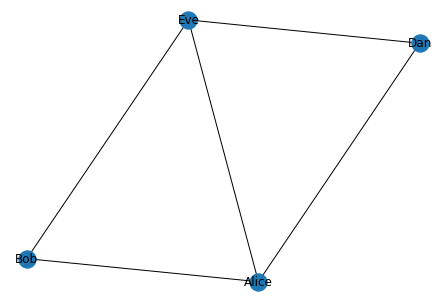

In [28]:
import networkx as nx
nx.draw(nx.from_edgelist(S), with_labels=True)

**Let's compute the total number of messages sent,**

In [30]:
sum([ edge[-1]['msg'] for edge in S ])

35

Or, more conveniently,

In [31]:
sum([ weight['msg'] for frm, to, weight in S ])

35

## Exercise

### Part 1: Modify Comprehensions

In [54]:
sales = [1_000, 12_000, 3_5600] # per month

Modify the following to compute the discounted price (ie., after 0.9*) in *USD*. Ie., also multiply by a conversion ratio of 1.35. 

In [56]:
[ 0.9 * s for s in sales ]

[900.0, 10800.0, 32040.0]

In [59]:
items = ["iPad", "Mouse", "Mac Mini"]

[ i.lower() for i in items ]

['ipad', 'mouse', 'mac mini']

Modify the above to uppercase the item name *and* return the first letter!

### Part 2: Write Comprehensions

Choose your own problem domain (eg., health, retail, insurance, ...).

Define two lists which represent categorical data (ie., text) and quantity data (ie., numbers).

Write a comprehension over both which summarises, or transforms these columns in a meaningful way.

#### Suggestions

Eg., sleep: HIGH/LOW QUALITY; hr: 60, 60, ...

* `len()` = 4 for H, 3 for L... mean of that.... is a kind of quality
* `sum()` on all hrs * 0.85... maybe .85 is the resting heart rate.

## Appendix: Filters

We can also *filter* using comprehensions,

In [63]:
prices

[1, 4, 65, 13]

Keep only those above $£5$, 

In [65]:
[ p for p in prices if p > 5]

[65, 13]

Discount them,

In [67]:
[ 0.9 * p for p in prices if p > 5]

[58.5, 11.700000000000001]

What's the mean price of discounted goods above $£5$ ?

In [68]:
mean([ 0.9 * p for p in prices if p > 5])

35.1